# First things first
Click **File -> Save a copy in Drive** and click **Open in new tab** in the pop-up window to save your progress in Google Drive.

# Gaussian processes and Bayesian optimization

In this assignment you will learn how to use <a href="http://sheffieldml.github.io/GPy/">GPy</a> and <a href="http://sheffieldml.github.io/GPyOpt/">GPyOpt</a> libraries to deal with gaussian processes. These libraries provide quite simple and inuitive interfaces for training and inference, and we will try to get familiar with them in a few tasks.

### Setup
Load auxiliary files and then install and import the necessary libraries.

In [1]:
! wget https://raw.githubusercontent.com/hse-aml/bayesian-methods-for-ml/master/setup_google_colab.py -O setup_google_colab.py
import setup_google_colab
setup_google_colab.load_data_week6()

--2021-08-07 11:11:32--  https://raw.githubusercontent.com/hse-aml/bayesian-methods-for-ml/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1232 (1.2K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   1.20K  --.-KB/s    in 0s      

2021-08-07 11:11:32 (48.8 MB/s) - ‘setup_google_colab.py’ saved [1232/1232]

https://raw.githubusercontent.com/hse-aml/bayesian-methods-for-ml/master/week6/w6_grader.py w6_grader.py


In [2]:
! pip install GPy gpyopt xgboost

     |████████████████████████████████| 959 kB 16.6 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 166.7 MB 36 kB/s s eta 0:00:01    |███████████▎                    | 58.9 MB 49.1 MB/s eta 0:00:03
     |████████████████████████████████| 71 kB 13.6 MB/s eta 0:00:01
  Created wheel for GPy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2564576 sha256=b3ef9a726a529f9ca3b283583b10ab50434e24e34e7766ce7e806e7b529c2cfd
  Stored in directory: /home/jovyan/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for gpyopt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83622 sha256=f7fa7489dd1366c75c15d812bb1ec466297e766ab66a02c9b70ff990016cf2e2
  Stored in directory: /home/jovyan/.cache/pip/wheels/e6/fa/d1/f9652b5af79f769a0ab74dbead7c7aea9a93c6bc74543fd3ec
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102549 sha256=bc2d0ff1dda69d7c93e180949d46319885

In [9]:
from pip._internal import main
try:
    import GPy, GPyOpt, xgboost
except:
    from pip._internal import main
    main(['install', 'GPy', 'GPyOpt', 'xgboost'])
    import GPy, GPyOpt, xgboost

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Using cached xgboost-1.4.2-py3-none-manylinux2010_x86_64.whl (166.7 MB)


In [10]:
import numpy as np
import GPy
import GPyOpt
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import time
from w6_grader import GPGrader
%matplotlib inline

### Grading
We will create a grader instace below and use it to collect your answers. Note that these outputs will be stored locally inside grader and will be uploaded to platform only after running submiting function in the last part of this assignment. If you want to make partial submission, you can run that cell any time you want.

In [11]:
grader = GPGrader()

## Gaussian processes: GPy (<a href="http://pythonhosted.org/GPy/">documentation</a>)

We will start with a simple regression problem, for which we will try to fit a Gaussian Process with RBF kernel.

In [12]:
def generate_points(n=25, noise_variance=0.0036):
    np.random.seed(777)
    X = np.random.uniform(-3., 3., (n, 1))
    y = np.sin(X) + np.random.randn(n, 1) * noise_variance**0.5
    return X, y
    
def generate_noise(n=25, noise_variance=0.0036):
    np.random.seed(777)
    X = np.random.uniform(-3., 3., (n, 1))
    y = np.random.randn(n, 1) * noise_variance**0.5
    return X, y

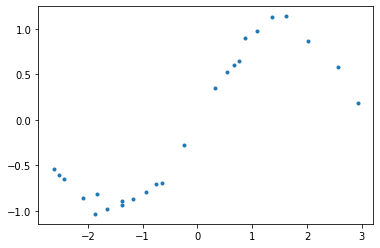

In [13]:
# Create data points
X, y = generate_points()
plt.plot(X, y, '.')
plt.show()

To fit a Gaussian Process, you will need to define a kernel. For Gaussian (GBF) kernel you can use `GPy.kern.RBF` function.

<b> Task 1.1: </b> Create RBF kernel with variance 1.5 and length-scale parameter 2 for 1D samples and compute value of the kernel between points `X[5]` and `X[9]`. Submit a single number. 
<br><b>Hint:</b> use `.K` property of kernel object.

In [15]:
X.shape

(25, 1)

In [25]:
kernel = GPy.kern.RBF(input_dim=1, variance=1.5, lengthscale=2) ### YOUR CODE HERE
kernel_59 = kernel.K(X, X)[5, 9]### YOUR CODE HERE
grader.submit_GPy_1(kernel_59)

Current answer for task 1.1 is: 1.0461813545396959


<b> Task 1.2: </b> Fit GP into generated data. Use kernel from previous task. Submit predicted mean and vairance at position $x=1$.
<br><b>Hint:</b> use `GPy.models.GPRegression` class.

In [30]:
model = GPy.models.GPRegression(X, y, kernel=kernel)### YOUR CODE HERE
mean, variance = model.predict(np.array([[1]]))### YOUR CODE HERE
# variance = ### YOUR CODE HERE
grader.submit_GPy_2(mean, variance)

initializing Y
initializing inference method
adding kernel and likelihood as parameters
Current answer for task 1.2 (mean) is: 0.6646774926102936
Current answer for task 1.2 (variance) is: 1.1001478223790582


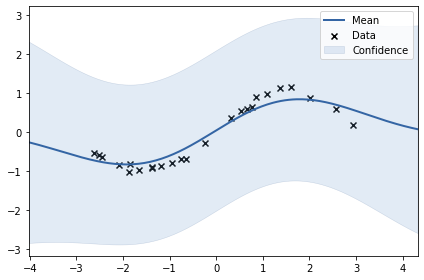

In [33]:
model.plot()
plt.show()

We see that the model didn't fit the data quite well. Let's try to fit kernel and noise parameters automatically as discussed in the lecture! You can see the current parameters below:

In [34]:
model

GP_regression.,value,constraints,priors
rbf.variance,1.5,+ve,
rbf.lengthscale,2.0,+ve,
Gaussian_noise.variance,1.0,+ve,


<b> Task 1.3: </b> Optimize length-scale, variance and noise component of the model and submit optimal length-scale value of the kernel. 
<br><b>Hint:</b> Use `.optimize()` function of the model and `.lengthscale` property of the kernel.

In [36]:
model.optimize()

In [37]:
model

GP_regression.,value,constraints,priors
rbf.variance,0.7099385341843278,+ve,
rbf.lengthscale,1.6252681688238988,+ve,
Gaussian_noise.variance,0.003897870808295543,+ve,


In [39]:
### YOUR CODE HERE
grader.submit_GPy_3(kernel.lengthscale)

Current answer for task 1.3 is: 1.6252681688238988


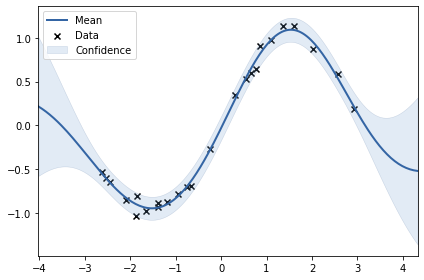

In [40]:
model.plot()
plt.show()

As you see, the process generates outputs just right. Let's see if GP can figure out itself when we try to fit it into noise or signal.

<b> Task 1.4: </b> Generate two datasets: sinusoid wihout noise and samples from gaussian noise. Optimize kernel parameters and submit optimal values of noise component.
<br><b>Note:</b> generate data only using ```generate_points(n, noise_variance)``` and ```generate_noise(n, noise_variance)``` function!

initializing Y
initializing inference method
adding kernel and likelihood as parameters


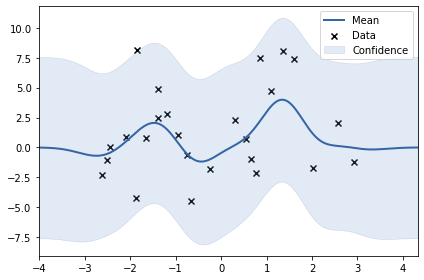

GP_regression.,value,constraints,priors
rbf.variance,4.840573944116265,+ve,
rbf.lengthscale,0.4624109451596924,+ve,
Gaussian_noise.variance,10.143341903515488,+ve,


In [66]:
X, y = generate_noise(noise_variance=10)
### YOUR CODE HERE
kernel = GPy.kern.RBF(input_dim=1, variance=1.5, lengthscale=2)
model = GPy.models.GPRegression(X, y, kernel=kernel)
model.optimize()
noise = model.Gaussian_noise.variance
model.plot()
plt.show()
model

initializing Y
initializing inference method
adding kernel and likelihood as parameters


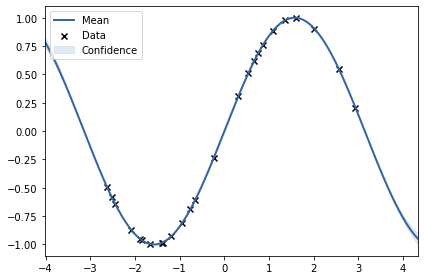

GP_regression.,value,constraints,priors
rbf.variance,4.023943299814818,+ve,
rbf.lengthscale,2.6455069416389385,+ve,
Gaussian_noise.variance,1.0315269895937981e-15,+ve,


In [67]:
X, y = generate_points(noise_variance=0)
### YOUR CODE HERE
kernel = GPy.kern.RBF(input_dim=1, variance=1.5, lengthscale=2)
model = GPy.models.GPRegression(X, y, kernel=kernel)
model.optimize()
just_signal = model.Gaussian_noise.variance
model.plot()
plt.show()
model

In [68]:
grader.submit_GPy_4(noise, just_signal)

Current answer for task 1.4 (noise) is: 10.143341903515488
Current answer for task 1.4 (just signal) is: 1.0315269895937981e-15


## Sparse GP
Now let's consider the speed of GP. We will generate a dataset of 3000 points and measure the time that is consumed for prediction of mean and variance for each point. We will then try to use inducing inputs and find the optimal number of points according to quality-time tradeoff.

For the sparse model with inducing points, you should use ```GPy.models.SparseGPRegression``` class. You can set the number of inducing inputs with parameter ```num_inducing``` and optimize their positions and values with ```.optimize()``` call.

<b>Task 1.5</b>: Create a dataset of 1000 points and fit GPRegression. Measure time for predicting mean and variance at position $x=1$. Then fit `SparseGPRegression` with 10 inducing inputs and repeat the experiment. Report speedup as a ratio between consumed time without and with inducing inputs.

In [96]:
X, y = generate_points(3000)

In [97]:
kernel = GPy.kern.RBF(input_dim=1, variance=1.5, lengthscale=2)
model = GPy.models.GPRegression(X, y, kernel=kernel)
model.optimize()
start = time.time()
### YOUR CODE HERE
model.predict(np.array([[1]]))
time_gp = time.time()-start

initializing Y
initializing inference method
adding kernel and likelihood as parameters


In [98]:
kernel = GPy.kern.RBF(input_dim=1, variance=1.5, lengthscale=2)
model = GPy.models.SparseGPRegression(X, y, kernel=kernel, num_inducing=10)
model.optimize()
start = time.time()
### YOUR CODE HERE
model.predict(np.array([[1]]))
time_sgp = time.time()-start

initializing Y
initializing inference method
adding kernel and likelihood as parameters
Adding Z as parameter


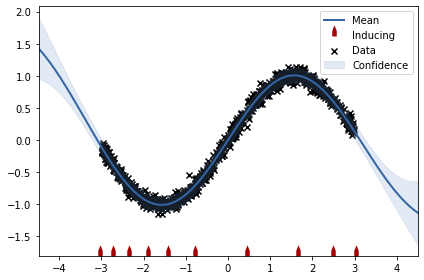

In [94]:
model.plot()
plt.show()

In [99]:
grader.submit_GPy_5(time_gp / time_sgp)

Current answer for task 1.5 is: 4.508587786259542


## Bayesian optimization: GPyOpt (<a href="http://pythonhosted.org/GPyOpt/">documentation</a>, <a href="http://nbviewer.jupyter.org/github/SheffieldML/GPyOpt/blob/master/manual/index.ipynb">tutorials</a>)

In this part of the assignment, we will try to find optimal hyperparameters to XGBoost model! We will use data from a small competition to speed things up, but keep in mind that the approach works even for large datasets.

We will use diabetes dataset provided in sklearn package.

In [102]:
dataset = sklearn.datasets.load_diabetes()
X = dataset['data']
y = dataset['target']

We will use cross-validation score to estimate accuracy and our goal will be to tune: ```max_depth```, ```learning_rate```, ```n_estimators``` parameters. The baseline MSE with default XGBoost parameters is $0.2$. Let's see if we can do better. First, we have to define optimization function and domains.

In [103]:
# Score. Optimizer will try to find minimum, so we will add a "-" sign.
def f(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        XGBRegressor(learning_rate=parameters[0],
                     max_depth=int(parameters[2]),
                     n_estimators=int(parameters[3]),
                     gamma=int(parameters[1]),
                     min_child_weight = parameters[4]), 
        X, y, scoring='neg_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

In [104]:
baseline = -cross_val_score(
    XGBRegressor(), X, y, scoring='neg_mean_squared_error'
).mean()
baseline

4217.028124311155

In [105]:
# Bounds (NOTE: define continuous variables first, then discrete!)
bounds = [
    {'name': 'learning_rate',
     'type': 'continuous',
     'domain': (0, 1)},

    {'name': 'gamma',
     'type': 'continuous',
     'domain': (0, 5)},

    {'name': 'max_depth',
     'type': 'discrete',
     'domain': (1, 50)},

    {'name': 'n_estimators',
     'type': 'discrete',
     'domain': (1, 300)},

    {'name': 'min_child_weight',
     'type': 'discrete',
     'domain': (1, 10)}
]

In [106]:
np.random.seed(777)
optimizer = GPyOpt.methods.BayesianOptimization(
    f=f, domain=bounds,
    acquisition_type ='MPI',
    acquisition_par = 0.1,
    exact_eval=True
)

In [107]:
max_iter = 50
max_time = 60
optimizer.run_optimization(max_iter, max_time)

initializing Y
initializing inference method
adding kernel and likelihood as parameters


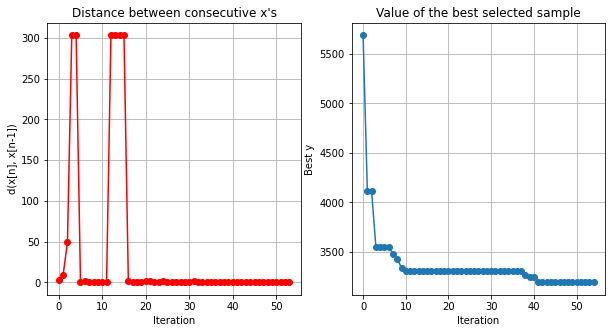

In [108]:
optimizer.plot_convergence()

Best values of parameters:

In [109]:
optimizer.X[np.argmin(optimizer.Y)]

array([3.76878739e-02, 1.29187494e+00, 1.00000000e+00, 3.00000000e+02,
       1.00000000e+00])

In [110]:
print('MSE:', np.min(optimizer.Y),
      'Gain:', baseline/np.min(optimizer.Y)*100)

MSE: 3192.738987070611 Gain: 132.0818313488365


We were able to get 9% boost without tuning parameters by hand! Let's see if you can do the same. 

<b>Task 2.1:</b> Tune SVR model. Find optimal values for three parameters: `C`, `epsilon` and `gamma`. Use range (1e-5, 1000) for `C`, (1e-5, 10) for `epsilon` and `gamma`. Use MPI as an acquisition function with weight 0.1. Submit the optimal value of epsilon that was found by a model.

In [147]:
bounds = [
    {'name': 'C',
     'type': 'continuous',
     'domain': (1e-5, 1000)},

    {'name': 'epsilon',
     'type': 'continuous',
     'domain': (1e-5, 10)},

    {'name': 'gamma',
     'type': 'continuous',
     'domain': (1e-5, 10)}
]

In [148]:
def f(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        SVR(C=parameters[0],
            epsilon=parameters[1],
            gamma=parameters[2]), 
        X, y, scoring='neg_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

In [149]:
np.random.seed(777)
optimizer = GPyOpt.methods.BayesianOptimization(
    f=f, domain=bounds,
    acquisition_type ='MPI',
    acquisition_par = 0.1,
    exact_eval=True
)

In [150]:
max_iter = 50
max_time = 180
optimizer.run_optimization(max_iter, max_time)

initializing Y
initializing inference method
adding kernel and likelihood as parameters


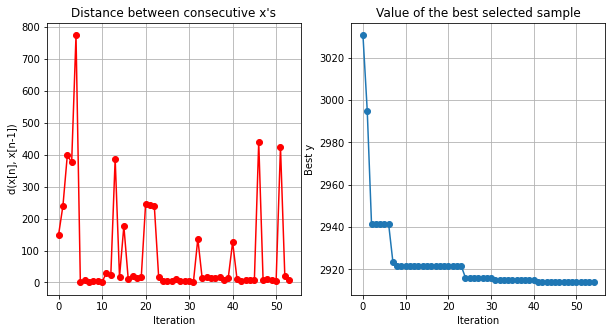

In [151]:
optimizer.plot_convergence()

In [152]:
optimizer.X[np.argmin(optimizer.Y)]

array([38.12281683, 10.        ,  8.29748335])

In [153]:
print('MSE:', np.min(optimizer.Y),
      'Gain:', baseline/np.min(optimizer.Y)*100)

MSE: 2913.8037070486375 Gain: 144.72588232728074


In [119]:
### YOUR CODE HERE
best_epsilon = optimizer.X[np.argmin(optimizer.Y)][1]### YOUR CODE HERE
grader.submit_GPyOpt_1(best_epsilon)

Current answer for task 2.1 is: 10.0


<b>Task 2.2:</b> For the model above submit boost in improvement that you got after tuning hyperparameters (output percents) [e.g. if baseline MSE was 40 and you got 20, output number 200]

In [137]:
performance_boost = baseline/np.min(optimizer.Y) ### YOUR CODE HERE
grader.submit_GPyOpt_2(performance_boost*100)

Current answer for task 2.2 is: 145.22590891349242


# Authorization & Submission
To submit assignment parts to Cousera platform, please, enter your e-mail and token into variables below. You can generate a token on this programming assignment's page. <b>Note:</b> The token expires 30 minutes after generation.

In [138]:
STUDENT_EMAIL = ''# EMAIL HERE
STUDENT_TOKEN = ''# TOKEN HERE
grader.status()

You want to submit these numbers:
Task 1.1: 1.0461813545396959
Task 1.2 (mean): 0.6646774926102936
Task 1.2 (variance): 1.1001478223790582
Task 1.3: 1.6252681688238988
Task 1.4 (noise): 10.143341903515488
Task 1.4 (just signal): 1.0315269895937981e-15
Task 1.5: 4.508587786259542
Task 2.1: 10.0
Task 2.2: 145.22590891349242


If you want to submit these answers, run cell below

In [139]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!
